### Relative molecular state ambiguity

Note that this script reproduces our analyses of p53-perturbed states shown in Figure 2.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
d_offi = pd.read_csv('./result/TGFOFF/' + 'TGFOFF_single_deltaF_normalized_in.csv', index_col = 0)
d_offo = pd.read_csv('./result/TGFOFF/' + 'TGFOFF_single_deltaF_normalized_out.csv', index_col = 0)

d_oni = pd.read_csv('./result/TGFON/' + 'TGFON_single_deltaF_normalized_in.csv', index_col = 0)
d_ono = pd.read_csv('./result/TGFON/' + 'TGFON_single_deltaF_normalized_out.csv', index_col = 0)

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

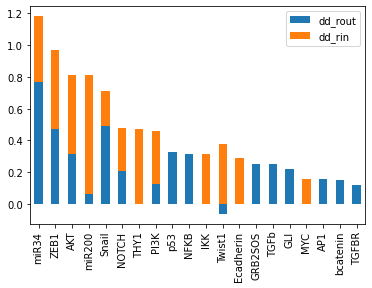

In [6]:
rin = d_oni.loc["[('p53', 1)]",:] - d_offi.loc["[('p53', 1)]",:]
rout = d_ono.loc["[('p53', 1)]",:] - d_offo.loc["[('p53', 1)]",:]

rin = rin.fillna(0)
rout = rout.fillna(0)
res = pd.concat([rin,rout,rin+rout],axis=1)
res.columns = ['dd_rin','dd_rout','sum']
res = res.loc[[x for x in res.index if x != 'Fvalue'],:]

plt.figure()
res.sort_values(by='sum', ascending=False).loc[:,['dd_rout','dd_rin']].iloc[:20,:].plot.bar(stacked=True)